Example reference: Machine Learning with Pytorch and Scikit-Learn by Sebastian Raschka, Yuxi (Hayden) Lie and Vahid Mirjalili

## Regression Models

Regression models are used to predict target variables on a continuous scales. They have many applications in industry such us forecasting the sales of a company in the future months.

### Linear Regression

The goal of linear regression is to model the relationship between one or multiple features X and a continuous target varible y.



#### Simple Linear Regression

The goal of the simple (univariate) linear regression is to model the relationship between a single feature (explanatory varible, x) and a continuous target y. The equation of al inear model with one explanatory variable is:

$y = w_1x + b$

Here the paramater (bias) $b$, represents the y axis intercept and $w_1$ is the weight coefficient of the explanatary variable.

The goal is to learn the weight of the linear equations to perfectly describe the relationship between x and y.

In other words, find the perfect straight line.

#### Multiple Linear Regression

Simple linear regression is a special case of Linear regression with just one variable. We can generalize and get the general formula:

$y = w_1x_1 + ... + w_mx_m + b = ∑_{i=1}^{m} = w_ix_i + b = w^{T}x _ b$

## The Ames Housing dataset

In this section, we will load the Ames Housing dataset using the pandas *read_csv* function, which is fast and veratile. A recommended tool for working with tabular data stored ina plaintext format.

The Ames Housing dataset consists of 2930 examples and 80 features. For simplicity, we will only work with a subset of the features, shown in the following list. However, if you are curious, follow the link to the full dataset description provided at the beginning of the section.

The features we will be working with, including the target varible are as follows:

* Overal Qual: Rating for the overall material and finish of the house on a scale from 1 (very poor) to 10 (excelent)
* Overal Cond: Rating for the overall condition of the house on a scale from 1 (very poor) to 10 (excelent)
* Gr Liv Area: Above grade (ground) living area in square feet
* Central Air: Centrail air conditining (N = no, Y = yes)
* Total Bsmt SF: Total square feet of the basement area
* SalePrice: Sale price in US dollars.

SalePrice is the target variable. The variable we want to predict.

* Dataset source: http://jse.amstat.org/v19n3/decock/AmesHousing.txt
* Dataset documentation: http://jse.amstat.org/v19n3/decock/DataDocumentation.txt
* Dataset write-up: http://jse.amstat.org/v19n3/decock.pdf

In [ ]:
import pandas as pd


columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area',
           'Central Air', 'Total Bsmt SF', 'SalePrice']


In [ ]:
df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt',
                 sep='\t',
                 usecols=columns)

df.head()

,Overall Qual,Overall Cond,Total Bsmt SF,Central Air,Gr Liv Area,SalePrice
0,6,5,1080.0,Y,1656,215000
1,5,6,882.0,Y,896,105000
2,6,6,1329.0,Y,1329,172000
3,7,5,2110.0,Y,2110,244000
4,5,5,928.0,Y,1629,189900


In [ ]:
# Lets explore the dimensions
df.shape

(2930, 6)

Some basic preprocessing.

As maintioned preprocessing is very important before training an algorithm.

In our case the "Central Air" Column has string values. We will convert to integers

In [ ]:
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

Lets check for missing data

In [ ]:
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,1
Central Air,0
Gr Liv Area,0
SalePrice,0


Remove rows that contain missing values

In [ ]:
# remove rows that contain missing values

df = df.dropna(axis=0)
df.isnull().sum()

,0
Overall Qual,0
Overall Cond,0
Total Bsmt SF,0
Central Air,0
Gr Liv Area,0
SalePrice,0


### Implement Linear Regression from Scratch

**Loss Function**

Before jumping into the implementation, lets define our loss: Mean Squared Error (MSE)

$L(w,b) = \frac{1}{2m}\sum_{i=1}^{m}(y_i - \hat{y_i})^2$

Here $\hat{y_i}$ is the predicted value.

In [ ]:
import numpy as np # Library for mathematical operations

In [ ]:
# Linear regression from scratch

class LinearRegressionGD:
  # eta is the learning rate used in Stochastic Gradient Descent
  # n_iter is the number of itteration we train our model to minimize the loss function
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        # Define the weights and the bias
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        # This is the loss function
        self.losses_ = []

        # Itterate over the total epochs
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            # update weights
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_
  # This is to make predictions
    def predict(self, X):
        return self.net_input(X)

#### Note!

This is important!
Here I assume you know how gradient descent works. If not please let me know!

This is a very good visual tutorial: https://www.youtube.com/watch?v=sDv4f4s2SB8&ab_channel=StatQuestwithJoshStarmer

Now lets implement linear regression

In [ ]:
# Will only use one features here for visualization purposes

# Define X and y variables
X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

We also standarize our data!!

Another very important concept in Machine Learning.

Questions here for Standarization??

In [ ]:
from sklearn.preprocessing import StandardScaler

sc_x = StandardScaler()
sc_y = StandardScaler()
X_std = sc_x.fit_transform(X)
y_std = sc_y.fit_transform(y[:, np.newaxis]).flatten()

In [ ]:
# Define and fit the Linear Regresion
lr = LinearRegressionGD(eta=0.1)
lr.fit(X_std, y_std)

Lets plot the loss function to check if we are minimizing it with more itterations

In [ ]:
import matplotlib.pyplot as plt

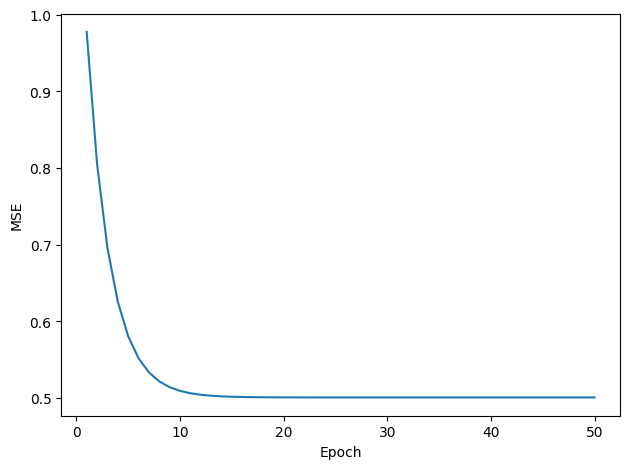

In [ ]:
plt.plot(range(1, lr.n_iter+1), lr.losses_)
plt.ylabel('MSE')
plt.xlabel('Epoch')
plt.tight_layout()
#plt.savefig('figures/09_06.png', dpi=300)
plt.show()

Good! The algorithm converged approximately after 10 epochs

Now lets visualize how well the model has fitted on the given data

In [ ]:
def lin_regplot(X, y, model):
    plt.scatter(X, y, c='steelblue', edgecolor='white', s=70)
    plt.plot(X, model.predict(X), color='black', lw=2)
    return

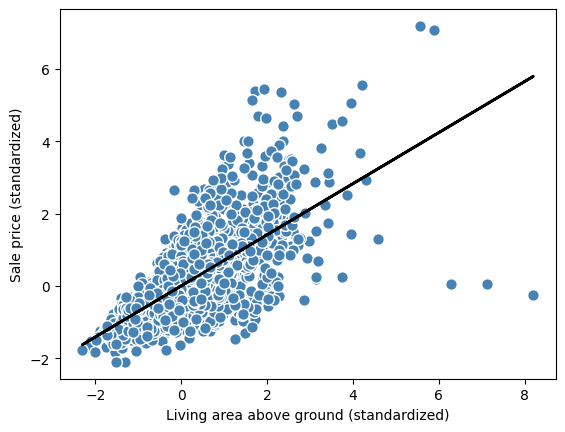

In [ ]:
lin_regplot(X_std, y_std, lr)
plt.xlabel('Living area above ground (standardized)')
plt.ylabel('Sale price (standardized)')

#plt.savefig('figures/09_07.png', dpi=300)
plt.show()

The linear model reflects the general trend.

The bigger the area, the higher the sales price.

Now lets see the weights of our model after training

In [ ]:
print(f'Slope: {lr.w_[0]:.3f}')
print(f'Intercept: {lr.b_[0]:.3f}')

Slope: 0.707
Intercept: -0.000


### Fit Linear Regression from Scikit-Learn

In real world applications we wont implement our own models. Instead we will rely on more efficient and well-written implementations.

Lets implement Linear Regression from sklearn

In [ ]:
from sklearn.linear_model import LinearRegression

Will also fit the model on the non-standarized data

In [ ]:
# Define the model
slr = LinearRegression()
# fit the model
slr.fit(X, y)
# Get predictions
y_pred = slr.predict(X)

Checking the weights

In [ ]:
print(f'Slope: {slr.coef_[0]:.3f}')
print(f'Intercept: {slr.intercept_:.3f}')

Slope: 111.666
Intercept: 13342.979


Scikit-Learn implementaion yielded different weights than our approach.

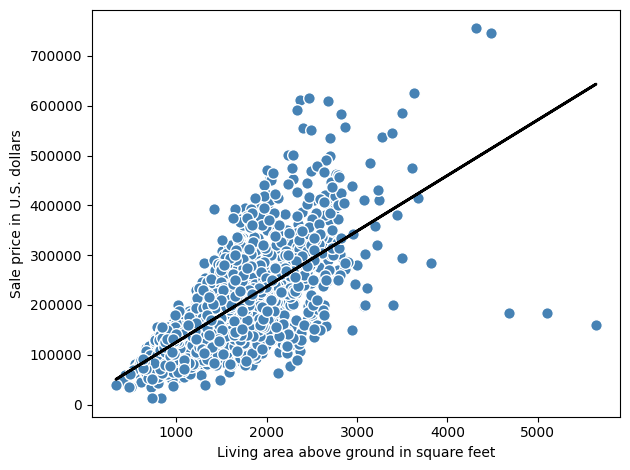

In [ ]:
lin_regplot(X, y, slr)
plt.xlabel('Living area above ground in square feet')
plt.ylabel('Sale price in U.S. dollars')

plt.tight_layout()
#plt.savefig('figures/09_08.png', dpi=300)
plt.show()

### Evaluate the predictions of the model

In the previous section we sow how to fit a regression model on training data. However, as we said, its very crucial to test the model on data that it has not seen during training to get a good estimate of its generalization performance

Now lets split our data to train-test

In [ ]:
from sklearn.model_selection import train_test_split

# Define the target and the fatures
target = 'SalePrice'
features = df.columns[df.columns != target]

X = df[features].values
y = df[target].values

# Make the split. 0.2 of the dataset is kept as test set
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=123)

In [ ]:
# Lets fit a model on training data only

slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

Next we define an evaluation metric!

We will use MSE (as defined earlier) to investigate the performance of the model

In [ ]:
from sklearn.metrics import mean_squared_error

# Calculate the performance both on training and test set
mse_train = mean_squared_error(y_train, y_train_pred)
mse_test = mean_squared_error(y_test, y_test_pred)

Attention!!

We are interested in the performance on unseen data!

In [ ]:
print(f'MSE train: {mse_train:.2f}')
print(f'MSE test: {mse_test:.2f}')

MSE train: 1583809579.51
MSE test: 1174304406.64


### Next steps!

Now that we have a simple benchmark, the next steps are to improve the performance of the model!!

We can preprocess our data more, get more features or simply try a more complex model high higher predictive power!!